In [2]:
#importing libraries
%matplotlib inline
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### Experimental Design by Krishna Devabhaktuni
### https://www.kaggle.com/henriqueyamahata/bank-marketing
### Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.

### We will be performing an A|B TEST and looking into how married and single people are subscribing based on the phone calls. By the end of this presentation, we are going to look at aspects like subscription rates of married and single people, whose subscription rates are better, what can we do to improve the subscription rates. We will be looking at mean subscription rates under various conditions, visualizing the subscription rates, we will also check if they are significantly different from one another

###   Data Dictionary
- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',            'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
             'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

### Related with the last contact of the current campaign:

- Contact: contact communication type (categorical:'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')
- Dayofweek: last contact day of the week (categorical:'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important
- note: this attribute highly affects the output target (e.g., if
- duration=0 then y='no'). Yet, the duration is not known before a callis performed. Also, after the end of the call y is obviously known.
- Thus, this input should only be included for benchmark purposes and
- should be discarded if the intention is to have a realistic predictive model.

### Other attributes:
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last
- contacted from a previous campaign (numeric; 999 means client was notpreviously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')

### Social and economic context attributes
- Emp.var.rate: employment variation rate - quarterly indicator(numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator(numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric) Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [4]:
banking = pd.read_csv('bank-additional-full.csv', sep = ';')
#Getting to know the data
print(banking.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [5]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
# Looking for missing values
banking.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
le = LabelEncoder()
banking['y_status'] = le.fit_transform(banking['y'])
bank = banking.copy()
bank['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

(array([1., 1., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([   80. ,  2564.8,  5049.6,  7534.4, 10019.2, 12504. , 14988.8,
        17473.6, 19958.4, 22443.2, 24928. ]),
 <a list of 10 Patch objects>)

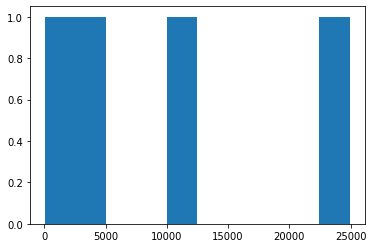

In [64]:
plt.hist(bank['marital'].value_counts())

### Comparing the subscription rate of single and married


In [11]:
married_df = bank[bank.marital == 'married']
single_df = bank[bank.marital == 'single']
print(married_df.shape)
print(single_df.shape)

(24928, 22)
(11568, 22)


### A difference in sample size is not an issue for an independent samples t-test. Each sample is large enough and should give reliable estimates, given the data meets the rest of our assumptions.

In [9]:
print("The Average Subscription rate of Married people is {:.2f}".format(married_df['y_status'].mean()))
print("The Average Subscription rate of Single people is {:.2f}".format(single_df['y_status'].mean()))

The Average Subscription rate of Married people is 0.10
The Average Subscription rate of Single people is 0.14


### We can see that the subscription rate is higher in Single's, Let's perform a t-test and make sure if there is a significant difference in our groups

In [10]:
stats.ttest_ind(married_df['y_status'], single_df['y_status'])

Ttest_indResult(statistic=-10.785981914415991, pvalue=4.4050099238429465e-27)

[[Text(0, 0, 'Single'), Text(0, 0, 'Married')]]

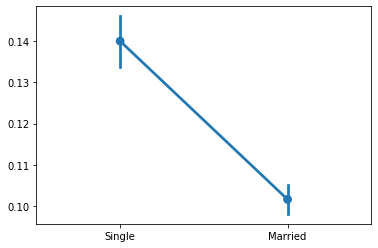

In [12]:
g = sns.pointplot(data=[single_df['y_status'],
                        married_df['y_status']], join=True)
                        
g.set(xticklabels = ['Single', 'Married'])

### We can see that there is a significant difference between our groups

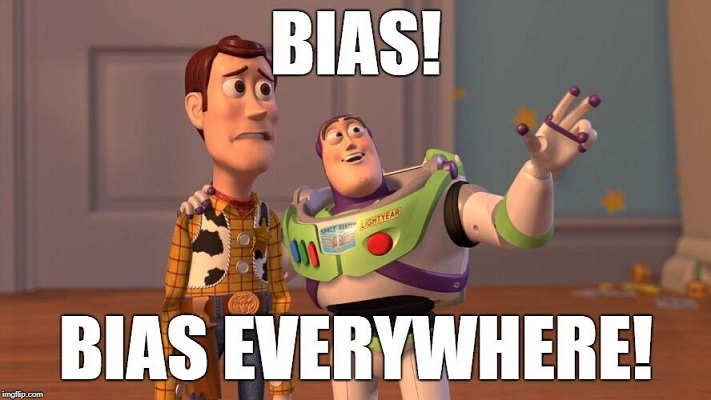

### The Overall Subscription rate is definitely higher, however, we need to think about seasonality. May be we were not able to contact Married people during Winter months due to their busy schedules. We will look into subscription rates during summer months only

In [13]:
summer_married = married_df[(married_df.month == 'may')|(married_df.month =='jun')|
                              (married_df.month == 'jul')| (married_df.month == 'aug')]
summer_single = single_df[(single_df.month == 'may')|(single_df.month == 'jun')|
                            (single_df.month == 'jul')| (single_df.month == 'aug')]

In [14]:
print("The Average Subscription rate of Married people in Summer is {:.2f}".format(summer_married['y_status'].mean()))
print("The Average Subscription rate of Single people in Summer is {:.2f}".format(summer_single['y_status'].mean()))

The Average Subscription rate of Married people in Summer is 0.08
The Average Subscription rate of Single people in Summer is 0.10


In [15]:
stats.ttest_ind(summer_single['y_status'], summer_married['y_status'])

Ttest_indResult(statistic=7.165024230811873, pvalue=7.963954305898505e-13)

[[Text(0, 0, 'Single'), Text(0, 0, 'Married')]]

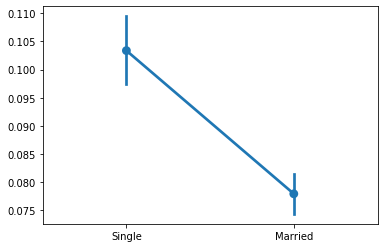

In [16]:
g1 = sns.pointplot(data=[summer_single['y_status'],
                        summer_married['y_status']], join=True)
                        
g1.set(xticklabels = ['Single', 'Married'])

### Although the subscription rate is higher in singles, we cannot see a significant difference between our groups

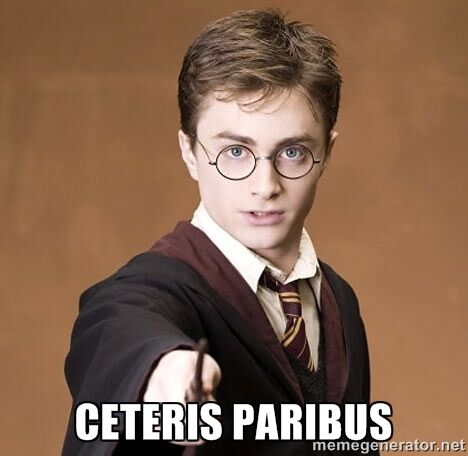

### We need to hold everything equal in order to compare 2 groups. We reduced seasonality by comparing summer months only, however, we need to compare similar age groups as well. In order to do that we compare ages 30 to 40 between the two groups

In [21]:
summer_married_age3040 = summer_married[(summer_married.age >= 30)& (summer_married.age <= 40)]
summer_single_age3040 = summer_single[(summer_single.age >= 30)&(summer_single.age <= 40)]

In [22]:
print(summer_married_age3040.shape)
print(summer_single_age3040.shape)

(8326, 22)
(4643, 22)


In [36]:
print("The Average Subscription rate of Married people in Summer with age 30-40 is {:.2f}".format(summer_married_age3040['y_status'].mean()))
print("The Average Subscription rate of Single people in Summer with age 30-40 is {:.2f}".format(summer_single_age3040['y_status'].mean()))

The Average Subscription rate of Married people in Summer with age 30-40 is 0.07
The Average Subscription rate of Single people in Summer with age 30-40 is 0.09


In [23]:
stats.ttest_ind(summer_single_age3040['y_status'], summer_married_age3040['y_status'])

Ttest_indResult(statistic=3.234645895027084, pvalue=0.0012209880773163208)

### We can now see the significant difference between the groups Married and Single. Singles have higher subscription rate than Married people

[[Text(0, 0, 'Single'), Text(0, 0, 'Married')]]

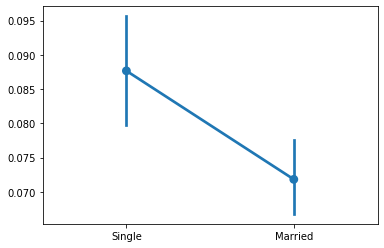

In [24]:
g2 = sns.pointplot(data=[summer_single_age3040['y_status'],
                        summer_married_age3040['y_status']], join=True)
                        
g2.set(xticklabels = ['Single', 'Married'])

In [26]:
married_age3040 = married_df[(married_df.age >= 30) & (married_df.age <= 40)]
single_age3040 = single_df[(single_df.age >= 30) & (single_df.age <= 40)]

### Let us compare our Groups in November

In [33]:
single_age3040_nov = single_age3040[single_age3040.month == 'nov']
married_age3040_nov = married_age3040[married_age3040.month == 'nov']

In [40]:
print("The Average Subscription rate of Married people in November is {:.2f}".format(married_age3040_nov['y_status'].mean()))
print("The Average Subscription rate of Single people in November is {:.2f}".format(single_age3040_nov['y_status'].mean()))

The Average Subscription rate of Married people in November is 0.07
The Average Subscription rate of Single people in November is 0.10


In [34]:
stats.ttest_ind(single_age3040_nov['y_status'], married_age3040_nov['y_status'])

Ttest_indResult(statistic=1.8205867426070397, pvalue=0.06883375951315605)

[[Text(0, 0, 'Single'), Text(0, 0, 'Married')]]

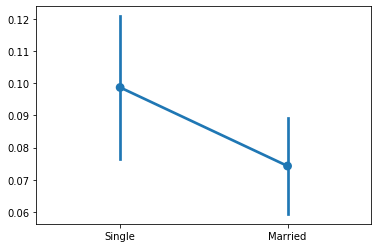

In [39]:
g3 = sns.pointplot(data=[single_age3040_nov['y_status'],
                        married_age3040_nov['y_status']], join=True)
                        
g3.set(xticklabels = ['Single', 'Married'])

### Singles have high subscription rate in November as well, however, the p-value is a little higher than 0.05. Now lets compare the month of May

In [46]:
married_age3040_may = married_age3040[married_age3040.month == 'may']
single_age3040_may = single_age3040[single_age3040.month == 'may']

In [48]:
print("The Average Subscription rate of Married people in May is {:.2f}".format(married_age3040_may['y_status'].mean()))
print("The Average Subscription rate of Single people in May is {:.2f}".format(single_age3040_may['y_status'].mean()))

The Average Subscription rate of Married people in May is 0.05
The Average Subscription rate of Single people in May is 0.08


In [49]:
stats.ttest_ind(single_age3040_may['y_status'], married_age3040_may['y_status'])

Ttest_indResult(statistic=3.4311223741725865, pvalue=0.0006052369855814975)

[[Text(0, 0, 'Single'), Text(0, 0, 'Married')]]

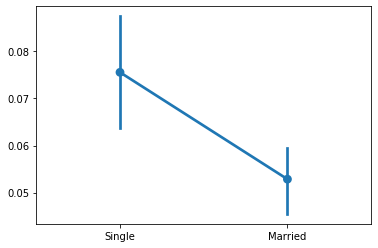

In [50]:
g4 = sns.pointplot(data=[single_age3040_may['y_status'],
                        married_age3040_may['y_status']], join=True)
                        
g4.set(xticklabels = ['Single', 'Married'])

### We have compared 2 major categories in our dataset with a response variable in various settings and comapred the subscription rates and we can clearly see that the subscription rate of singles category is higher than subscription rate of the married people. In most of the conditions, the subscription rate is significantly different from other group. We have also visualized the differences using a point plot.

### We can suggest the Portugese Banking institution that our results conclude higher subscription rate in singles than Married people. In order to increase the subscription rate of the Married people we need to come up with different plans that are tailored for Married people. We may conduct some surveys with Married customers in order to create better plans that suits Married Customers. Also we need to find other ways to contact Married customers such as "Texting" and "Emailing" as Married customers may have limited time due to their busy schedules. We also suggest the bank customer service to be open during the weekends so that the Married customers can be contacted and it is also convenient for customers to resolve their queries during the weekend.